# 축제 기간 (23.09.02~23.09.10) 연령대별 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 한글 폰트 설정
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

In [3]:
data_frames = []

for i in range(2, 11):
    print(f"{i}번째 ", end=" ")
    index = str(i).rjust(2, '0')
    df_tmp = pd.read_csv(f"od_20230901_10/od_202309{index}_1.csv")
    to_muju = (df_tmp['dest_hdong_cd'] == 4573025000) & (df_tmp['dest_purpose'] == 5)
    data_frames.append(df_tmp[to_muju])
del df_tmp

df_od = pd.concat(data_frames, axis=0)
df_od

2번째  3번째  4번째  5번째  6번째  7번째  8번째  9번째  10번째  

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
2269,4573033000,4573025000,20230902,20:00,20:00,0,3,1.0,5.0,5,20247,28,9
4773,4573032000,4573025000,20230902,17:00,19:00,0,4,0.0,5.0,5,128030,118,9
9568,4573032000,4573025000,20230902,19:00,20:00,0,3,0.0,5.0,5,76014,57,17
19607,3611051500,4573025000,20230902,15:00,17:00,0,0,0.0,0.0,5,187524,99,12
19619,4719025600,4573025000,20230902,15:00,17:00,1,0,0.0,0.0,5,255417,121,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012158,4573033000,4573025000,20230910,09:00,10:00,0,4,0.0,5.0,5,198465,86,5
3095262,4573032000,4573025000,20230910,10:00,11:00,0,2,1.0,5.0,5,54279,34,5
3170004,4573032000,4573025000,20230910,09:00,10:00,0,4,0.0,5.0,5,63485,47,5
3199215,4573032000,4573025000,20230910,10:00,10:00,1,2,0.0,5.0,5,63622,37,5


In [8]:
data_frames = []

for i in range(2, 11):
    print(f"{i}번째 ", end=" ")
    index = str(i).rjust(2, '0')
    df_tmp = pd.read_csv(f"stay_20230901_15/stay_202309{index}_1.csv")
    stay_muju = (df_tmp['hdong_cd'] == 4573025000) & (df_tmp['purpose'] == 5)
    data_frames.append(df_tmp[stay_muju])
del df_tmp

df_stay = pd.concat(data_frames, axis=0)
df_stay

2번째  3번째  4번째  5번째  6번째  7번째  8번째  9번째  10번째  

,hdong_cd,date,time,gender,age,purpose,stay_cnts
8754,4573025000,20230902,21:00,1,4,5,780
9141,4573025000,20230902,21:00,1,3,5,1021
19624,4573025000,20230902,21:00,0,4,5,958
23640,4573025000,20230902,21:00,0,0,5,645
42442,4573025000,20230902,20:00,0,0,5,656
...,...,...,...,...,...,...,...
3504766,4573025000,20230910,21:00,0,7,5,27
3511998,4573025000,20230910,23:00,0,0,5,23
3515722,4573025000,20230910,23:00,0,7,5,27
3575220,4573025000,20230910,13:00,0,8,5,9


In [4]:
df_hdong = pd.read_csv("KIKmix_20230701.csv")

df_hdong = df_hdong.drop_duplicates(subset='행정동코드').reset_index(drop=True)

df_hdong

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN
4,1111054000,서울특별시,종로구,삼청동,1111013900,팔판동,19880423,NaN
...,...,...,...,...,...,...,...,...
3878,5183031000,강원특별자치도,양양군,서면,5183031000,서면,20230611,NaN
3879,5183032000,강원특별자치도,양양군,손양면,5183032000,손양면,20230611,NaN
3880,5183033000,강원특별자치도,양양군,현북면,5183033000,현북면,20230611,NaN
3881,5183034000,강원특별자치도,양양군,현남면,5183034000,현남면,20230611,NaN


---

## 1. 연령대 간 비교

### 1) 주이동수단 (modal)
- 0: 차량, 1: 시내버스, 2: 지하철, 3: 도보, 4: 기타, 5철도, 6: 시외고속버스, 7: 항공기
- 차량: 자가용, 택시, 화물차 
- 주이동수단 정의: 해당 이동에서 가장 긴 시간동안 이용한 교통수단 

In [5]:
for column in ['modal', 'origin_purpose', 'age']:
    print(f"OD_Column: {column}")
    print(df_od[column].unique())
    print()  # 빈 줄로 구분

OD_Column: modal
[1. 0. 4.]

OD_Column: origin_purpose
[ 5.  0.  4.  3. nan]

OD_Column: age
[3 4 0 1 2 5 6 7]



- 차량과 시내버스만 데이터가 있다. 시외버스 이용 데이터는 없다. 

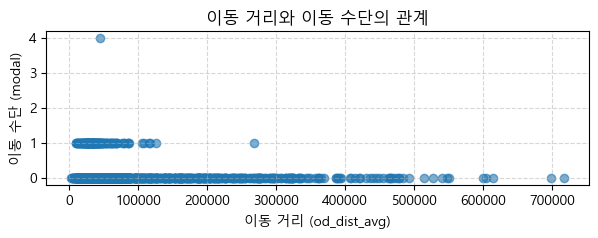

In [6]:
plt.figure(figsize=(7, 2))
plt.scatter(df_od['od_dist_avg'], df_od['modal'], alpha=0.6)

plt.xlabel('이동 거리 (od_dist_avg)')
plt.ylabel('이동 수단 (modal)')
plt.title('이동 거리와 이동 수단의 관계')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- 대부분 차량(승용차, 고속버스, 택시 포함. 시외버스 미포함.)을 이용
- 100km 내에서 시내버스 이용

---

### 2) 방문객 연령대 분포 확인

In [9]:
# age별로 그룹화하고 cnts 합산
age_od_cnts = df_od.groupby('age')['od_cnts'].sum().reset_index()
age_stay_cnts = df_stay.groupby('age')['stay_cnts'].sum().reset_index()

# pd.merge(left, right, how, on, left_on, right_on, left_index, right_index)
age_cnts = pd.merge(age_od_cnts, age_stay_cnts, 'right', 'age')

age_cnts = age_cnts.fillna(0)  # NaN을 0으로 채움
age_cnts['od_cnts'] = age_cnts['od_cnts'].astype(int)

age_cnts

,age,od_cnts,stay_cnts
0,0,5894,40985
1,1,92,12814
2,2,382,22592
3,3,2052,55263
4,4,1873,60258
5,5,243,39985
6,6,145,29316
7,7,6,9920
8,8,0,2127


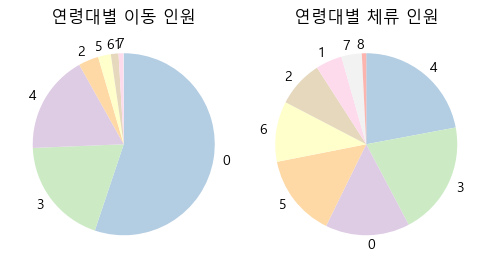

In [10]:
# cnts 내림차순 정렬
age_od_cnts = age_od_cnts.sort_values(by='od_cnts', ascending=False)
age_stay_cnts = age_stay_cnts.sort_values(by='stay_cnts', ascending=False)

# 색상 설정
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([1,2,3,4,5,6,7,8,0]))

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(5, 10))

# 첫 번째 파이 차트
axes[0].pie(age_od_cnts['od_cnts'], labels=age_od_cnts['age'], startangle=90, counterclock=False, colors=colors)
axes[0].set_title("연령대별 이동 인원")

# 두 번째 파이 차트 (예시로 동일한 데이터 사용, 다른 설정 가능)
axes[1].pie(age_stay_cnts['stay_cnts'], labels=age_stay_cnts['age'], startangle=90, counterclock=False, colors=colors)
axes[1].set_title("연령대별 체류 인원")

# 그래프 간격을 자동으로 조정하여 보기 좋게 만들기
plt.tight_layout()

# 그래프 표시
plt.show()

- 이동 인원 순위: 00대 - 30대 - 40대 - 20대 - 50대 - 60대 - 10대 - 70대
- 체류 인원 순위: 40대 - 30대 - 00대 - 50대 - 60대 - 20대 - 10대 - 70대 - 80대

- 초등학생 자녀가 있는 가족 단위 여행객이 가장 많음.
- 10대, 20대는 상대적으로 적다. 프로그램이나 축제 특성이 10대, 20대를 잘 타겟팅하지 못한 듯. 20대를 겨냥한 듯한 EDM파티를 7일동안 행사프로그램으로 넣은 것을 봤을 때, 20대 또한 타겟팅하고 있는 것을 알 수 있음. 20대 인원이 낮은 이유가 교통편과 관련해 있을지 아래 od데이터로 파악해보기. 
- 80대: OD데이터에 측정 안되지만 체류하기는 함.
- 50,60대도 은근 많다. 50,60대는 이동 인원에서는 수가 확연히 적지만 체류 인원에서는 많은 것이 특이. (둘 다 skt에서 측정했을텐데, 이동할 때 폰을 사용 안하다면 그것 때문일 수 있는지?)
- (같은 맥락으로, 00대가 이동 인원에서 많이 차지하는 이유가 이동 시 핸드폰을 많이 사용하는 것과 관련 있는지? but *00대 측정방법 궁금)

---

### 3) 이동거리

                 od_dist_avg  od_duration_avg
od_dist_avg         1.000000         0.787821
od_duration_avg     0.787821         1.000000
5.1043084506410095
5.1043084506410095


<Figure size 500x300 with 0 Axes>

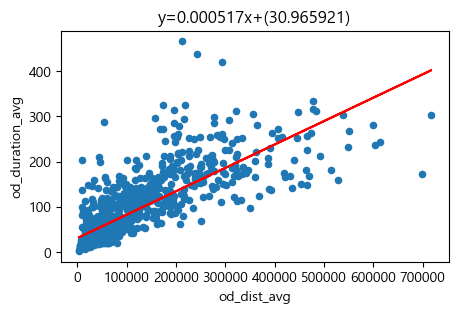

In [11]:
## 이동거리, 이동시간 상관관계 알아보기

# 상관계수
print(df_od[['od_dist_avg', 'od_duration_avg']].corr())

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(2):
    VIF = variance_inflation_factor(df_od[['od_dist_avg', 'od_duration_avg']], i)
    print(VIF)

# Scatter Plot and Trend Line
plt.figure(figsize=(5, 3))
df_od.plot(kind='scatter', x='od_dist_avg', y='od_duration_avg', figsize=(5, 3))
fit_weight = np.polyfit(df_od['od_dist_avg'], df_od['od_duration_avg'], 1) # x값, y값에 열 지정해주고 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)

plt.plot(df_od['od_dist_avg'], trend_f(df_od['od_dist_avg']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

In [12]:
# age별로 그룹화하고 od_dist_avg 컬럼을 평균
age_dist_avg = df_od.groupby('age')['od_dist_avg'].mean().reset_index()
age_dist_avg['od_dist_avg'] = age_dist_avg['od_dist_avg'].astype(int)
age_dist_avg

,age,od_dist_avg
0,0,138907
1,1,71337
2,2,75795
3,3,73361
4,4,87917
5,5,55522
6,6,52124
7,7,26887


연령대별 평균 이동 거리 분석
- 50,60,70대가 상대적으로 작다. 50km 내외에서 옴.
- 00대가 특히 멀리서 오고, 나머지 10,20,30,40대는 70~80km 정도.

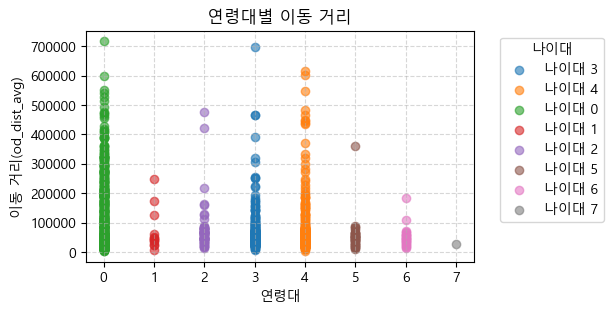

In [13]:
plt.figure(figsize=(5, 3))

# 각 나이대에 대해 점 그리기
for age in df_od['age'].unique():
    age_data = df_od[df_od['age'] == age]
    plt.scatter([age] * len(age_data), age_data['od_dist_avg'], alpha=0.6, label=f'나이대 {age}')

#plt.ylim(0, 250000)
plt.xlabel('연령대')
plt.ylabel('이동 거리(od_dist_avg)')
plt.title('연령대별 이동 거리')
plt.legend(title='나이대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

서울-무주가 200km인데 도대체 300km이상은 뭐지..

In [14]:
filtered_df = df_od[df_od['od_dist_avg'] >= 600000]
filtered_df

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
2743204,1156053500,4573025000,20230903,11:00,16:00,0,0,0.0,0.0,5,717067,303,12
2053255,2671025300,4573025000,20230905,14:00,17:00,0,3,0.0,5.0,5,698489,172,6
312643,1144059000,4573025000,20230907,09:00,13:00,0,4,0.0,4.0,5,613873,244,5
260641,2611053000,4573025000,20230908,12:00,17:00,1,0,0.0,0.0,5,600124,281,14
2737605,2826053700,4573025000,20230908,13:00,17:00,0,4,0.0,0.0,5,603274,237,5


In [15]:
filetered_df_hdongname = pd.merge(filtered_df[['origin_hdong_cd', 'od_dist_avg', 'od_duration_avg']], 
                                  df_hdong[['행정동코드','시도명','시군구명']], 'left', left_on='origin_hdong_cd', right_on='행정동코드')
filetered_df_hdongname

,origin_hdong_cd,od_dist_avg,od_duration_avg,행정동코드,시도명,시군구명
0,1156053500,717067,303,1156053500,서울특별시,영등포구
1,2671025300,698489,172,2671025300,부산광역시,기장군
2,1144059000,613873,244,1144059000,서울특별시,마포구
3,2611053000,600124,281,2611053000,부산광역시,중구
4,2826053700,603274,237,2826053700,인천광역시,서구


-> 거리 숫자에 대해서는 나중에 논의. 패턴 분석하자면 
- 00대, 30대, 40대: 먼 거리 ex.서울, 부산, 인천에서도 온다
- 가족 단위로 방문 추정. 먼 거리에서도 오지만, 가까운 거리에서 방문율도 엄청 높다. 핵가족이 무주근처에 많이 사는 건 아닐 것 같아, 주위 다른 여행지에서 오는 것이 집계된 것으로 현재까지 추정. or 택시
- 10대, 20대, 30대, 40대 평균은 비슷: 70-80km 정도. 00대는 평균이 130km. 50대, 60대는 50km. 70대는 26km.
- 평균은 비슷하지만, 10대, 20대는 200km이상은 거의 없음. 대부분 100km 내에서 옴. 50대, 60대 또한. 

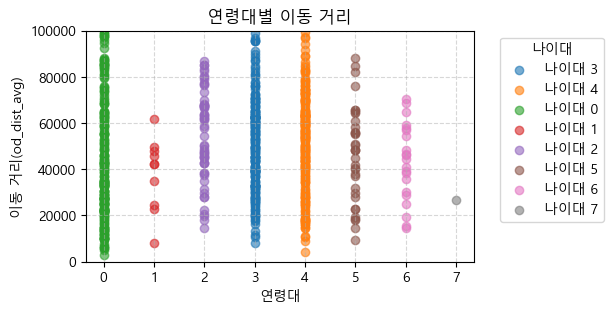

In [16]:
plt.figure(figsize=(5, 3))

# 각 나이대에 대해 점 그리기
for age in df_od['age'].unique():
    age_data = df_od[df_od['age'] == age]
    plt.scatter([age] * len(age_data), age_data['od_dist_avg'], alpha=0.6, label=f'나이대 {age}')

plt.ylim(0, 100000)
plt.xlabel('연령대')
plt.ylabel('이동 거리(od_dist_avg)')
plt.title('연령대별 이동 거리')
plt.legend(title='나이대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

---

## 2. 각 연령대 분석
- 어디서 오는지, 시간, 이동 시간, 이동 수단을 보자
- 20, 50/60대 중심으로

In [17]:
# age_20 = df_od['age'] == 2
# df_od_20 = df_od[age_20]
# df_od_20

# 각 age에 대해 데이터프레임 생성
dataframes = {}

for age in range(0, 8):
    age_filter = df_od['age'] == age
    dataframes[f'age_{age}'] = df_od[age_filter]

In [ ]:
dataframes['age_2']

### 1) 이동수단

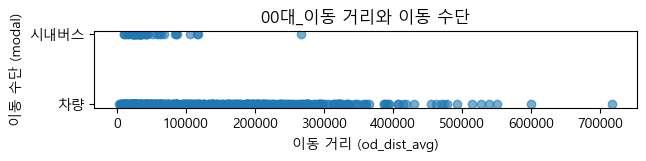

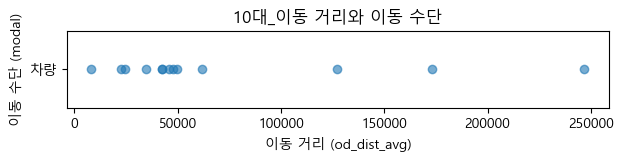

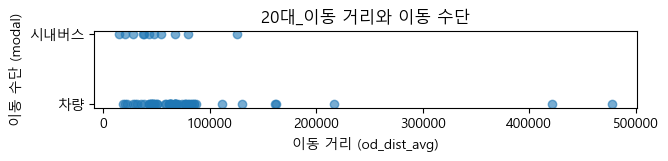

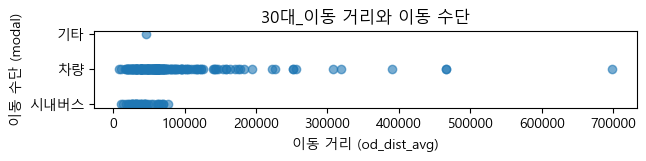

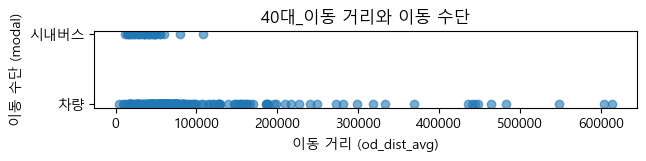

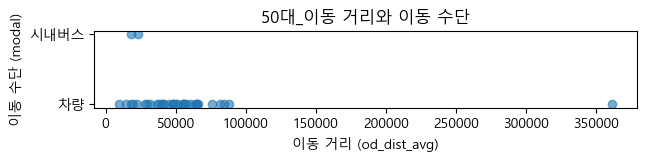

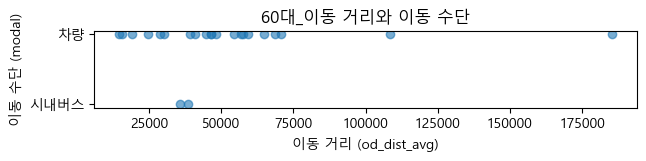

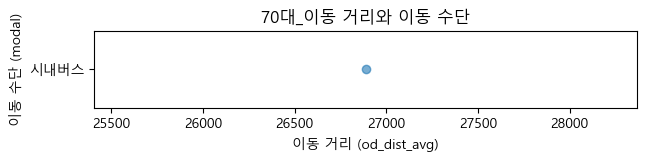

In [19]:
modal_mapping = {
    0: '차량',
    1: '시내버스',
    2: '지하철',
    3: '도보',
    4: '기타',
    5: '철도',
    6: '시외고속버스',
    7: '항공기',
}

for i in range(0,8):
    _df = dataframes['age_'+str(i)]
    plt.figure(figsize=(7, 1))

    _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)

    plt.scatter(_df['od_dist_avg'], _df['modal_str'], alpha=0.6)
    
    plt.xlabel('이동 거리 (od_dist_avg)')
    plt.ylabel('이동 수단 (modal)')
    plt.title(f'{i}0대_이동 거리와 이동 수단')

    unique_modal_values = _df['modal_str'].unique()
    plt.yticks(unique_modal_values)
    
    plt.show()


- 50,60대 시내버스 이용률 낮음.
- 전체 시내버스 이용량 중 00,20,30,40대의 이용량이 많음. 

### 2) 도착시간

In [67]:
# # 도착시간을 기준으로 od_cnts를 합산
# grouped_data = dataframes['age_2'].groupby('end_time')['od_cnts'].sum().reset_index()

# # 막대 그래프 그리기
# plt.figure(figsize=(10, 6))
# plt.bar(grouped_data['end_time'], grouped_data['od_cnts'], color='skyblue')

# # 그래프 레이블 설정
# plt.xlabel('도착 시간')
# plt.ylabel('인원(od_cnts 합)')
# plt.title('20대_도착 시간별 인원 수')

# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


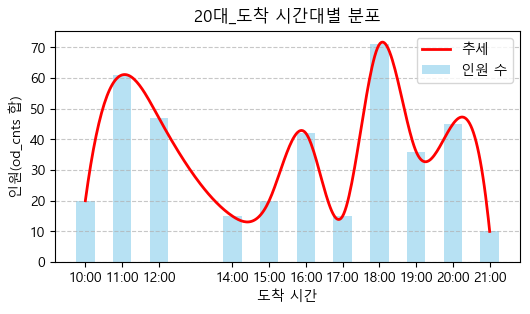

In [33]:
from scipy.interpolate import make_interp_spline

# 도착 시간 문자열을 숫자 형태로 변환 (예: 08:00 -> 8.0)
grouped_data['end_time_numeric'] = pd.to_datetime(grouped_data['end_time'], format='%H:%M').dt.hour

# 부드러운 곡선을 위해 x, y 값 설정
x = grouped_data['end_time_numeric']
y = grouped_data['od_cnts']

# x를 300개의 점으로 보간
xnew = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)  # 부드러운 곡선을 위해 보간 (k: 차수)
y_smooth = spl(xnew)

# 막대 그래프와 부드러운 곡선 그리기
plt.figure(figsize=(6, 3))

# 막대 그래프 그리기
plt.bar(x, y, width=0.5, color='skyblue', alpha=0.6, label='인원 수')

# 부드러운 곡선 그리기
plt.plot(xnew, y_smooth, color='red', linestyle='-', linewidth=2, label='추세')

# 그래프 레이블 설정
plt.xlabel('도착 시간')
plt.ylabel('인원(od_cnts 합)')
plt.title('20대_도착 시간대별 분포')
plt.xticks(x, grouped_data['end_time'])  # 원래의 도착시간 레이블 사용

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


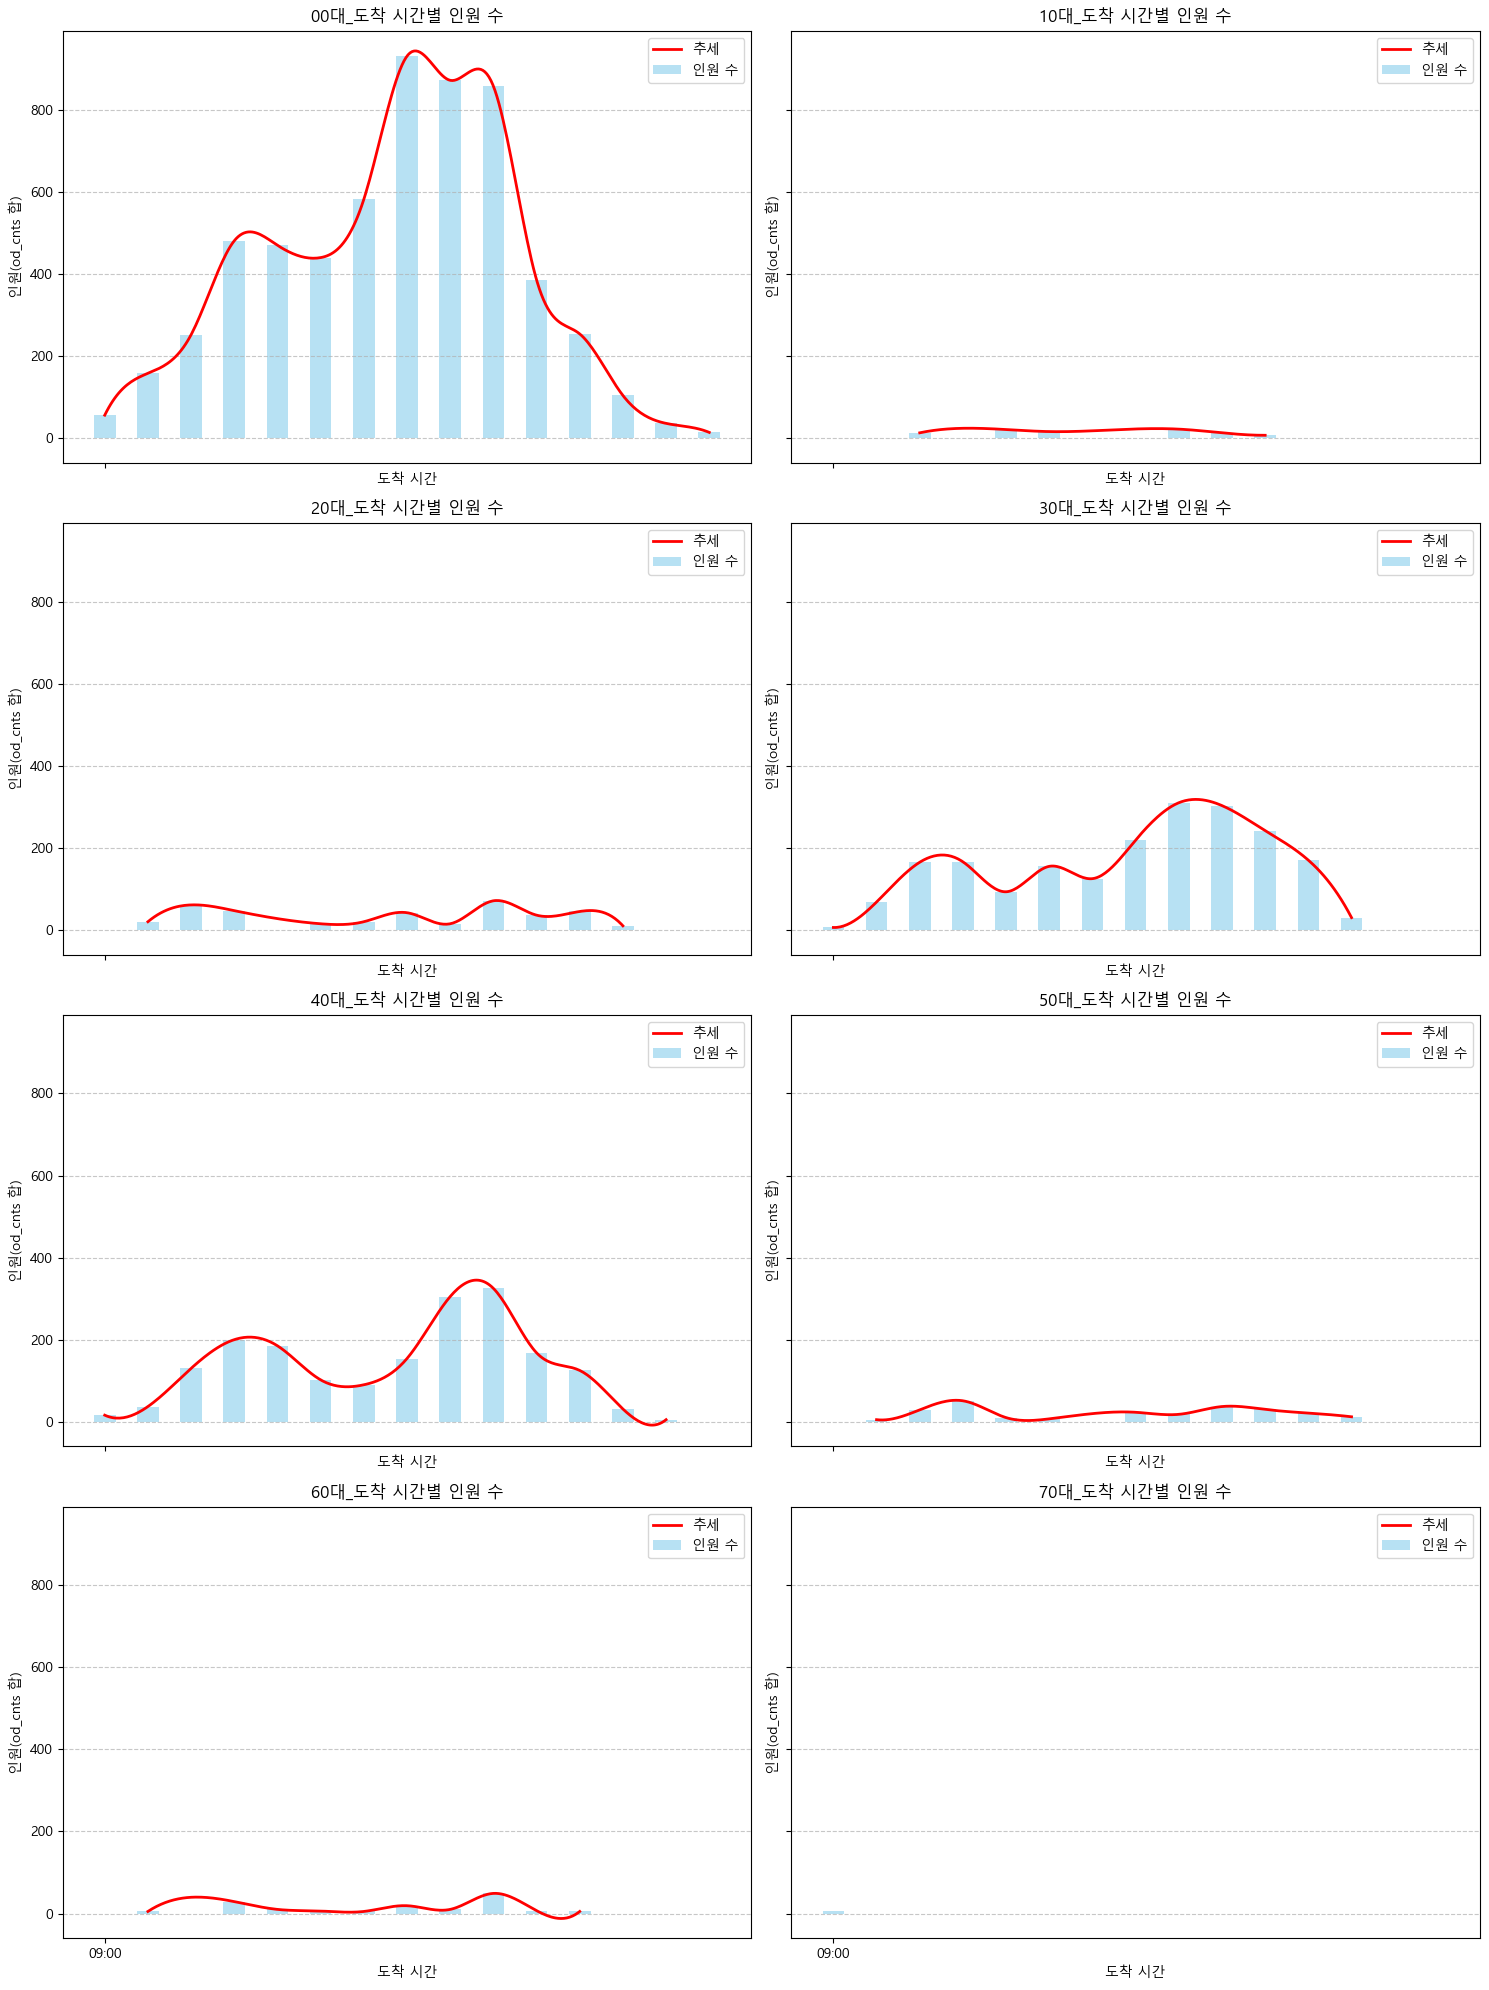

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), sharex=True, sharey=True)

for i in range(8):  # 0대부터 70대까지 (0~7)
    # 데이터프레임 가져오기 (예: age_0, age_1, ..., age_7)
    _df = dataframes['age_' + str(i)]
    
    # 도착시간을 기준으로 od_cnts를 합산
    grouped_data = _df.groupby('end_time')['od_cnts'].sum().reset_index()

    # 도착 시간 문자열을 숫자 형태로 변환 (예: 08:00 -> 8.0)
    grouped_data['end_time_numeric'] = pd.to_datetime(grouped_data['end_time'], format='%H:%M').dt.hour

    # 부드러운 곡선을 위해 x, y 값 설정
    x = grouped_data['end_time_numeric']
    y = grouped_data['od_cnts']

    # x를 300개의 점으로 보간
    if len(x) > 1:  # 데이터 포인트가 1개 이상일 때만 보간
        xnew = np.linspace(x.min(), x.max(), 300)
        spl = make_interp_spline(x, y, k=3)  # 부드러운 곡선을 위해 보간 (k: 차수)
        y_smooth = spl(xnew)
    else:
        xnew, y_smooth = x, y  # 데이터 포인트가 적을 때는 보간하지 않음

    # 서브플롯 선택
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # 막대 그래프 그리기
    ax.bar(x, y, width=0.5, color='skyblue', alpha=0.6, label='인원 수')

    # 부드러운 곡선 그리기
    ax.plot(xnew, y_smooth, color='red', linestyle='-', linewidth=2, label='추세')

    # y축 범위를 각 그래프에 맞게 설정 (최대값에 여유 추가)
    #y_max = y.max() * 1.1  # 최대값의 110% 정도로 설정하여 여유 추가
    #ax.set_ylim(0, y_max)

    # 그래프 레이블 설정
    ax.set_xlabel('도착 시간')
    ax.set_ylabel('인원(od_cnts 합)')
    ax.set_title(f'{i}0대_도착 시간별 인원 수')
    ax.set_xticks(x)
    ax.set_xticks(x, grouped_data['end_time'])  # 원래의 도착시간 레이블 사용

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    
# # 나이대가 8개라서 남은 9번째 서브플롯을 제거
# fig.delaxes(axes[2, 2])

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

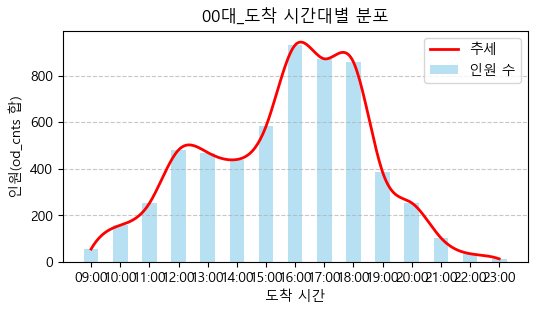

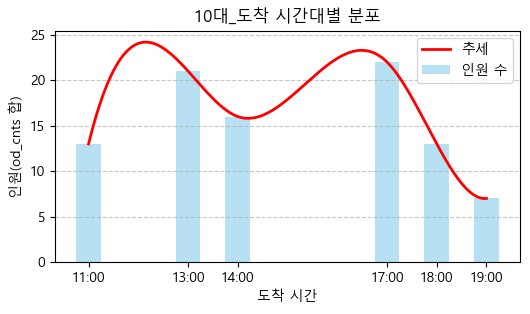

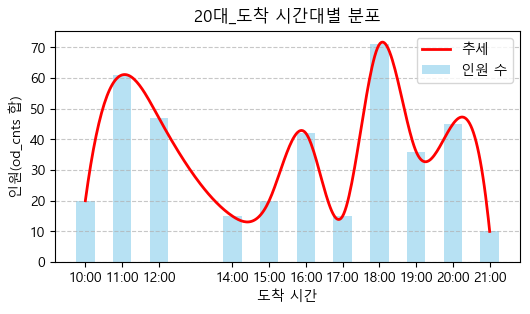

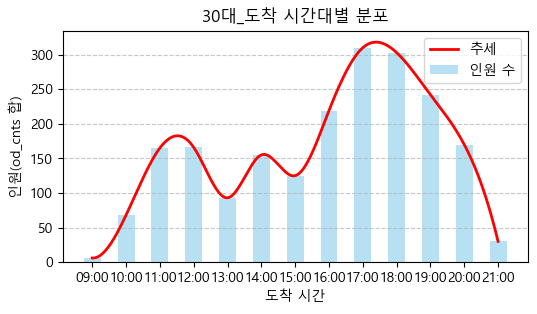

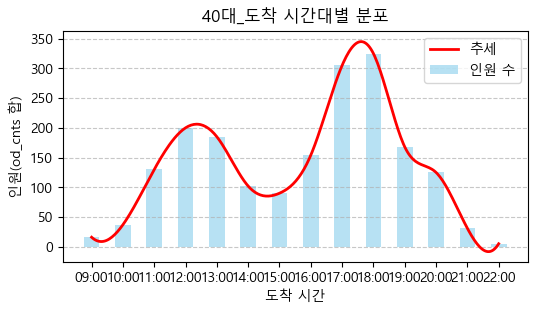

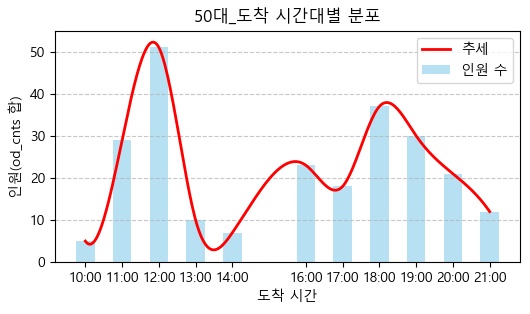

C:\Users\User\AppData\Local\Temp\ipykernel_1412\2557277781.py:40: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(f'time_age{i}.png', dpi=300, bbox_inches='tight')
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


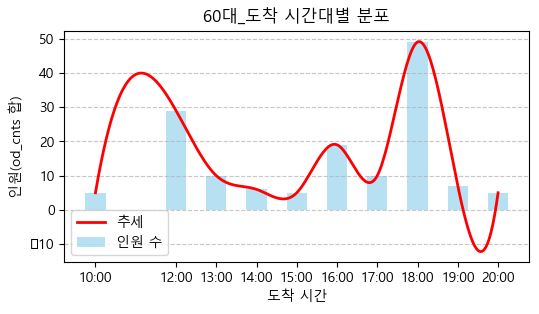

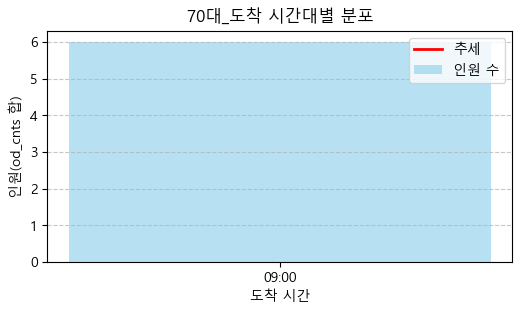

In [65]:
for i in range(8):  # 0대부터 70대까지 (0~7)
    # 데이터프레임 가져오기 (예: age_0, age_1, ..., age_7)
    _df = dataframes['age_' + str(i)]
    
    # 도착시간을 기준으로 od_cnts를 합산
    grouped_data = _df.groupby('end_time')['od_cnts'].sum().reset_index()

    # 도착 시간 문자열을 숫자 형태로 변환 (예: 08:00 -> 8.0)
    grouped_data['end_time_numeric'] = pd.to_datetime(grouped_data['end_time'], format='%H:%M').dt.hour
    
    # 부드러운 곡선을 위해 x, y 값 설정
    x = grouped_data['end_time_numeric']
    y = grouped_data['od_cnts']
    
    # x를 300개의 점으로 보간
    if len(x) > 1:  # 데이터 포인트가 1개 이상일 때만 보간
        xnew = np.linspace(x.min(), x.max(), 300)
        spl = make_interp_spline(x, y, k=3)  # 부드러운 곡선을 위해 보간 (k: 차수)
        y_smooth = spl(xnew)
    else:
        xnew, y_smooth = x, y  # 데이터 포인트가 적을 때는 보간하지 않음
    
    # 막대 그래프와 부드러운 곡선 그리기
    plt.figure(figsize=(6, 3))
    
    # 막대 그래프 그리기
    plt.bar(x, y, width=0.5, color='skyblue', alpha=0.6, label='인원 수')
    
    # 부드러운 곡선 그리기
    plt.plot(xnew, y_smooth, color='red', linestyle='-', linewidth=2, label='추세')
    
    # 그래프 레이블 설정
    plt.xlabel('도착 시간')
    plt.ylabel('인원(od_cnts 합)')
    plt.title(f'{i}0대_도착 시간대별 분포')
    plt.xticks(x, grouped_data['end_time'])  # 원래의 도착시간 레이블 사용
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.savefig(f'time_age{i}.png', dpi=300, bbox_inches='tight')
    plt.show()


## 3. 축제 기간 내 일별 분석

- 연령대별 일별 방문객 비교.
- stay data
- 일별로 그룹화해서 stay_cnts 합산 

In [68]:
# 각 age에 대해 데이터프레임 생성 (STAY데이터)
dataframes_stay = {}

for age in range(0, 8):
    age_filter = df_stay['age'] == age
    dataframes_stay[f'age_{age}'] = df_stay[age_filter]

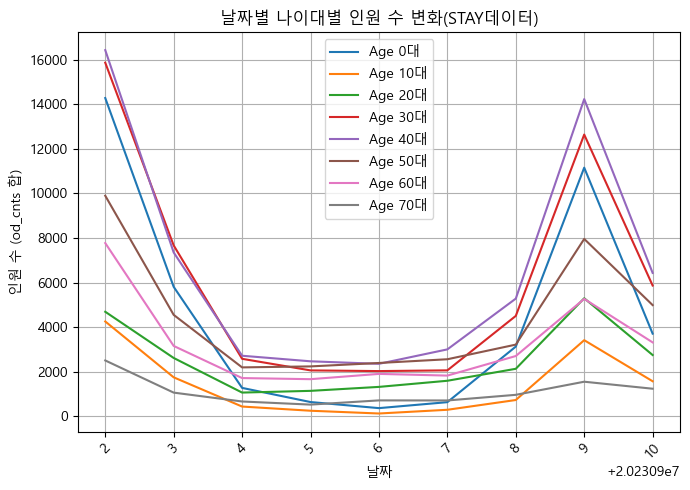

In [78]:
# 그래프 설정
plt.figure(figsize=(7, 5))

# 각 나이대별 데이터프레임을 사용하여 선 그래프 생성
for i in range(0, 8):
    _df = dataframes_stay['age_' + str(i)]
    # 날짜별로 od_cnts 합산
    df_grouped = _df.groupby('date')['stay_cnts'].sum().reset_index()

    # 선 그래프 그리기
    plt.plot(df_grouped['date'], df_grouped['stay_cnts'], label=f'Age {i * 10}대')

# 그래프 레이블 설정
plt.xlabel('날짜')
plt.ylabel('인원 수 (od_cnts 합)')
plt.title('날짜별 나이대별 인원 수 변화(STAY데이터)')
plt.xticks(rotation=45)
plt.legend()

# 그래프 출력
plt.grid(True)
plt.tight_layout()
plt.show()


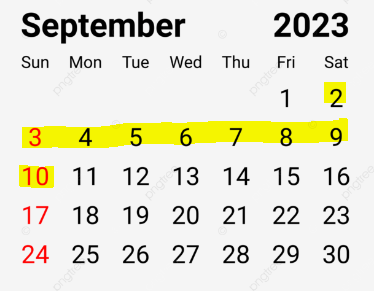

In [107]:
df_od.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084 entries, 2269 to 3238635
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   origin_hdong_cd  1084 non-null   int64  
 1   dest_hdong_cd    1084 non-null   int64  
 2   date             1084 non-null   int64  
 3   start_time       1084 non-null   object 
 4   end_time         1084 non-null   object 
 5   gender           1084 non-null   int64  
 6   age              1084 non-null   int64  
 7   modal            1084 non-null   float64
 8   origin_purpose   1083 non-null   float64
 9   dest_purpose     1084 non-null   int64  
 10  od_dist_avg      1084 non-null   int64  
 11  od_duration_avg  1084 non-null   int64  
 12  od_cnts          1084 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 118.6+ KB


In [111]:
dataframes_od_date = {}
dates = [20230902,20230903,20230904,20230905,20230906,20230907,20230908,20230909,20230910]
times = sorted(list(df_od['end_time'].unique()))
print(times)

for date in dates:
    date_filter = df_od[df_od['date'] == date]
    grouped_date = date_filter.groupby('end_time')['od_cnts'].sum().reset_index()
    dataframes_od_date[f'date_{date}'] = grouped_date

dataframes_od_date['date_20230903']

['09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']


,end_time,od_cnts
0,09:00,25
1,10:00,87
2,11:00,167
3,12:00,292
4,13:00,166
5,14:00,149
6,15:00,87
7,16:00,153
8,17:00,97
9,18:00,92


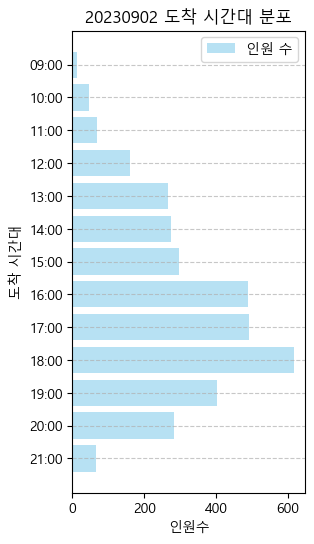

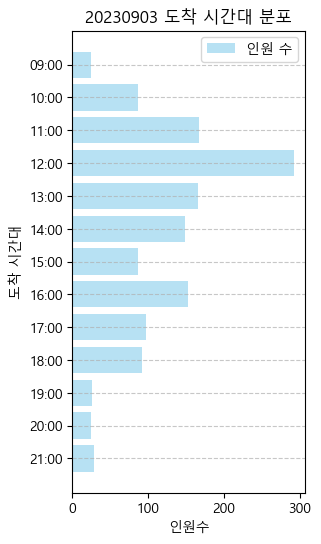

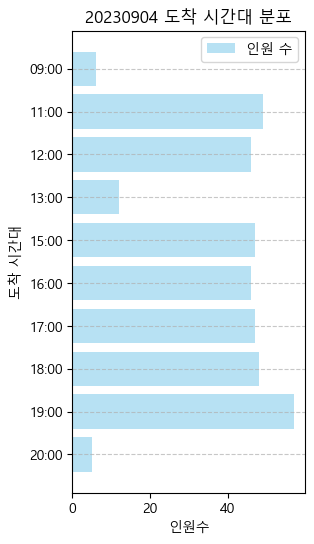

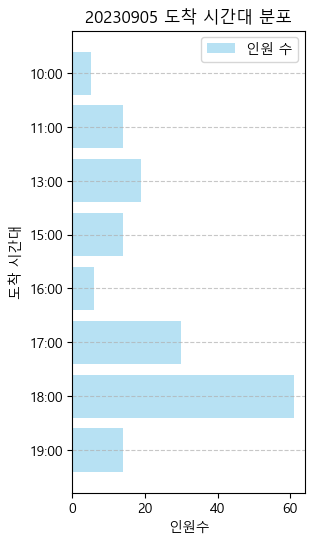

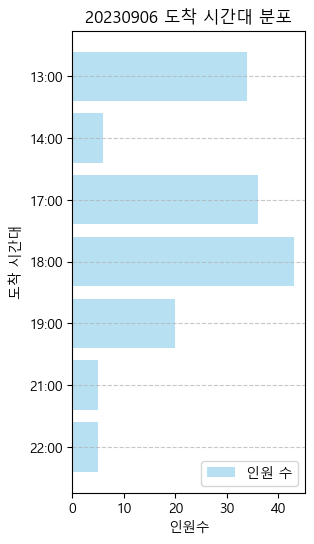

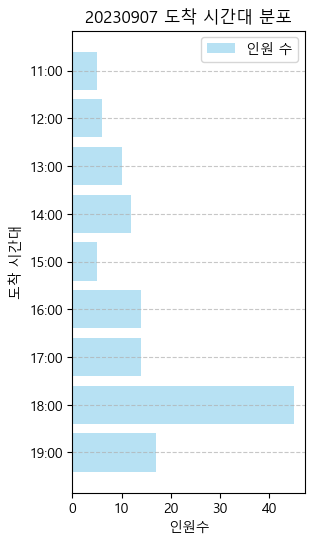

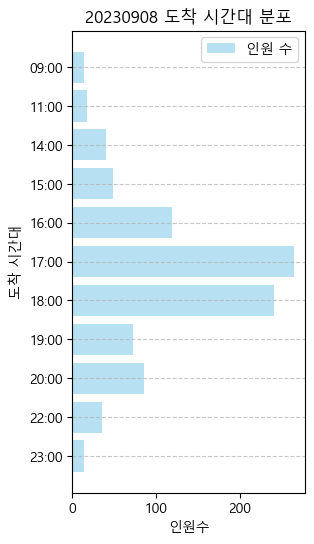

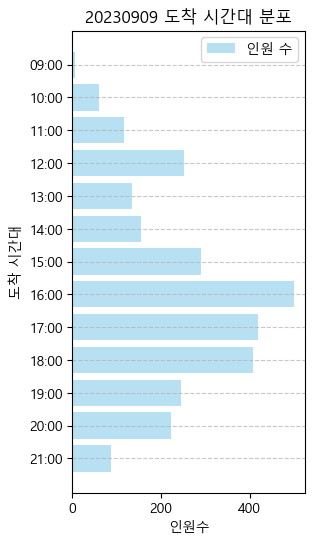

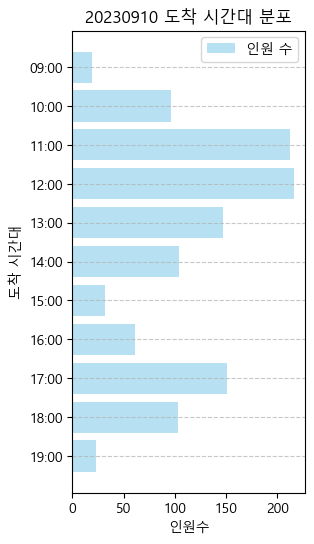

In [126]:
dates = [20230902,20230903,20230904,20230905,20230906,20230907,20230908,20230909,20230910]

for date in dates:  # 0대부터 70대까지 (0~7)
    # 데이터프레임 가져오기 (예: age_0, age_1, ..., age_7)
    _df = dataframes_od_date['date_' + str(date)]

    plt.figure(figsize=(3,6))
    
    # 막대 그래프 그리기
    plt.barh(_df['end_time'], _df['od_cnts'], color='skyblue', alpha=0.6, label='인원 수')
    
    # 부드러운 곡선 그리기
    #plt.plot(xnew, y_smooth, color='red', linestyle='-', linewidth=2, label='추세')
    plt.gca().invert_yaxis()
    
    # 그래프 레이블 설정
    plt.xlabel('인원수')
    plt.ylabel('도착 시간대')
    plt.title(f'{date} 도착 시간대 분포')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.savefig(f'barh_date_time_count_{str(date)}.png', dpi=300, bbox_inches='tight')
    plt.show()
